Columns:
* year: year of resale
* town: town the resale flat is located within
* flat_type: the flat type of the resale flat
    * 1 ROOM
    * 2 ROOM
    * 3 ROOM
    * 4 ROOM
    * 5 ROOM
    * EXECUTIVE
    * MULTI-GENERATION
* block: block number of the resale flat
* street_name: the street name of the resale flat
* storey_range: the range of stories that the resale flat is on
* floor_area_sqm
* flat_model
    * Improved
    * New Generation
    * Model A
    * Model A2
    * Standard
    * Simplified
    * Apartment
    * Premium Apartment
    * Maisonette
    * Model A-Maisonette
    * Premium Maisonette
    * Improved-Maisonette
    * Type S1
    * Type S2
    * Adjoined flat
    * Terrace
    * DBSS
    * Multi Generation
    * Premium Apartment Loft
    * 2-room
* lease_commence_date: year that the lease commenced
* remaining_lease
* resale_price
* transaction_year
* price_per_sqm
* age_month
* remaining_lease_month
* postal
* address
* geometry
* mallCount
* busInterchangeCount
* sportsCount
* hawkerCount
* npParkCount
* preschoolCount
* primarySchCount
* secondarySchCount
* tertiarySchCount
* dist_nearestMRT
* transaction_month

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import time
import matplotlib.pyplot as plt

In [24]:
# # data = pd.read_csv('./y2015_to_2017_buffer_750.csv')
# data = pd.read_csv('./y2015_to_2017_buffer_1500.csv')

# # drop rows with any null value
# data.dropna(inplace = True)

# # drop columns:
# # geometry (for processing only)
# # remaining_lease: duplicate of remaining_lease_month
# data.drop(['geometry', 'remaining_lease', 'street_name', 'address', 'block', 'price_per_sqm', 'floor_area_sqm','age_month', 'lease_commence_date'], axis=1, inplace=True)

# # cleaning the month column to just keep the year
# data['month'] = data['month'].apply(lambda x: int(x[:4]))
# data.rename(columns={"month": "year"}, inplace=True)

# # cut postal code to only be first 3 digits
# data['postal'] = data['postal'].apply(lambda x: int(str(x)[:3]))

# # change storey_range to average of floors, to change categorical to numerical
# data['storey_range'] = data['storey_range'].apply(lambda x: (int(x[:2]) + int(x[-2:]))/2)

C:\Users\giles\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
# data = pd.read_csv('./y2015_to_2017_buffer_1500.csv')
data = pd.read_csv('./y2015_to_2017_buffer_750.csv')

# drop rows with any null value
data.dropna(inplace = True)

# drop columns:
# remaining_lease: 
data.drop([
    'geometry', # for processing only
    'remaining_lease', # duplicate of remaining_lease_month
    'street_name', # random
    'address',  # random
    'block', # random
    'floor_area_sqm', # feature used to create target
    'age_month', # highly correlated to remaining_lease_month
    'lease_commence_date', # var used to create remaining_lease_month
    'transaction_month', # limited use
    'resale_price', # highly correlated to target
    'month' # duplicate of transaction_date
], axis=1, inplace=True)

# # log price_per_sqm
# data['price_per_sqm'] = data['price_per_sqm'].apply(lambda x: np.log(1 + x))

# # cleaning the month column to just keep the year
# data['month'] = data['month'].apply(lambda x: int(x[:4]))
# data.rename(columns={"month": "year"}, inplace=True)

# cut postal code to only be first 3 digits
data['postal'] = data['postal'].apply(lambda x: int(str(x)[:3]))

# change storey_range to average of floors, to change categorical to numerical
data['storey_range'] = data['storey_range'].apply(lambda x: (int(x[:2]) + int(x[-2:]))/2)

C:\Users\giles\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
data

,town,flat_type,storey_range,flat_model,transaction_year,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT
0,ANG MO KIO,3 ROOM,8.0,Improved,2015,4250.00,840.0,560,0.0,0.0,0.0,0.0,2.0,12.0,2.0,1.0,1.0,1.697526
1,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4044.12,780.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.497407
2,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4130.43,768.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
3,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4130.43,756.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
4,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4264.71,756.0,560,0.0,0.0,0.0,0.0,0.0,11.0,2.0,1.0,0.0,0.497407
5,ANG MO KIO,3 ROOM,8.0,New Generation,2015,4264.71,744.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.497407
6,ANG MO KIO,3 ROOM,8.0,New Generation,2015,4264.71,768.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.497407
7,ANG MO KIO,3 ROOM,8.0,New Generation,2015,4328.36,768.0,560,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.0,1.0,0.752168
8,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4264.71,768.0,560,3.0,1.0,0.0,0.0,1.0,14.0,1.0,3.0,0.0,0.307042
9,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4308.82,780.0,560,0.0,0.0,2.0,2.0,1.0,10.0,2.0,1.0,0.0,0.503092


## Encoding Categorical Variables

* changing categorical variables into numerical ones

*Source: [Python One Hot Encoding with Pandas Made Simple](http://www.insightsbot.com/python-one-hot-encoding-with-pandas-made-simple/)*

In [81]:
data.head()

,town,flat_type,storey_range,flat_model,transaction_year,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT
0,ANG MO KIO,3 ROOM,8.0,Improved,2015,4250.00,840.0,560,0.0,0.0,0.0,0.0,2.0,12.0,2.0,1.0,1.0,1.697526
1,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4044.12,780.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.497407
2,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4130.43,768.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
3,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4130.43,756.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
4,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4264.71,756.0,560,0.0,0.0,0.0,0.0,0.0,11.0,2.0,1.0,0.0,0.497407


In [82]:
# categorical_vars = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
categorical_vars = [['town', 'town'], ['flat_type', 'ft'], ['flat_model', 'fm']]

for cat in categorical_vars:
    data[cat[0]] = pd.Categorical(data[cat[0]])
    catDummies = pd.get_dummies(data[cat[0]], prefix = cat[1])
    data = pd.concat([data, catDummies], axis=1)
    data.drop(cat[0], axis=1, inplace=True)

In [83]:
data.shape

(106767, 68)

In [84]:
data.columns

Index(['storey_range', 'transaction_year', 'price_per_sqm',
       'remaining_lease_month', 'postal', 'mallCount', 'busInterchangeCount',
       'sportsCount', 'hawkerCount', 'npParkCount', 'preschoolCount',
       'primarySchCount', 'secondarySchCount', 'tertiarySchCount',
       'dist_nearestMRT', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'ft_1 ROOM', 'ft_2 ROOM', 'ft_3 ROOM',
       'ft_4 ROOM', 'ft_5 ROOM', 'ft_EXECUTIVE', 'ft_MULTI-GENERATION',
       'fm_2-room', 'fm_Adjoined flat', 'fm_Apartment', '

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [86]:
#Seperate datasets

X = data.drop('price_per_sqm', axis=1)
Y = data['price_per_sqm']

print(X.shape)
print(Y.shape)

X.dtypes

(106767, 67)
(106767,)


storey_range                 float64
transaction_year               int64
remaining_lease_month        float64
postal                         int64
mallCount                    float64
busInterchangeCount          float64
sportsCount                  float64
hawkerCount                  float64
npParkCount                  float64
preschoolCount               float64
primarySchCount              float64
secondarySchCount            float64
tertiarySchCount             float64
dist_nearestMRT              float64
town_ANG MO KIO                uint8
town_BEDOK                     uint8
town_BISHAN                    uint8
town_BUKIT BATOK               uint8
town_BUKIT MERAH               uint8
town_BUKIT PANJANG             uint8
town_BUKIT TIMAH               uint8
town_CENTRAL AREA              uint8
town_CHOA CHU KANG             uint8
town_CLEMENTI                  uint8
town_GEYLANG                   uint8
town_HOUGANG                   uint8
town_JURONG EAST               uint8
t

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

LR = LinearRegression()

In [88]:
LR.fit(x_train,y_train)
%time

Wall time: 0 ns


In [89]:
Intercept= LR.intercept_
Coefficients = LR.coef_

In [90]:
Coefficients

array([ 4.53510382e+01, -2.23010110e+01,  4.21983510e+00,  1.32475932e-01,
        5.05054450e+01,  1.41478912e+02,  3.04521141e+01,  3.04521141e+01,
        4.37136651e+01, -1.24055065e+01, -2.02597506e+01,  4.38252140e+01,
        2.93889197e+01, -4.40190710e+02,  4.73581754e+01,  1.54618577e+02,
        9.57487612e+02, -7.75602007e+02,  1.38947330e+03, -1.09190752e+03,
        1.73734738e+03,  1.48280030e+03, -1.56732258e+03,  5.41628669e+02,
        4.14255612e+02, -6.07089001e+02, -3.80855459e+02, -1.00791116e+03,
        7.61904919e+02,  2.44491412e+03, -7.07033060e+02, -8.80450249e+02,
        1.45182300e+03, -1.74928804e+03, -1.03246899e+03,  2.72654323e+02,
       -2.05385746e+02,  6.00867238e+02, -1.35625249e+03, -8.95566909e+02,
        7.45540537e+02,  2.22115949e+02, -7.03705436e+01, -2.25171619e+02,
       -3.82544774e+02, -2.61423016e+02, -2.81465341e+01,  1.47792889e-12,
       -2.43265178e+02, -4.78170360e+02,  4.34128222e+02, -6.18935525e+02,
        8.04285345e+02, -

In [91]:
Intercept

46834.884791027296

In [92]:
import statsmodels.api as sm

In [93]:
X=sm.add_constant(X)        #Add a constant value
model= sm.OLS(Y,X).fit()         
predictions= model.summary()      
predictions


C:\Users\giles\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_per_sqm   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     8131.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:55:47   Log-Likelihood:            -8.0954e+05
No. Observations:              106767   AIC:                         1.619e+06
Df Residuals:                  106704   BIC:                         1.620e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      3.663e+04   1663.424     22.021      0.000    3.34e+04    3.99e+04
storey_range                 45.2246      0.295    153.223      0.000      44.646      45.803
transaction_year            -21.5425      1.019    -21.151      0.000     -23.539     -19.546
remaining_lease_month         4.2064      0.018    233.293      0.000       4.171       4.242
postal                        0.1593      0.021      7.497      0.000       0.118       0.201
mallCount                    49.3349      1.762     28.005      0.000      45.882      52.788
busInterchangeCount         146.1133      3.540     41.274      0.000     139.175     153.052
sportsCount                  29.2515      1.459     20.046      0.000      26.391      32.112
hawkerCount                  29.2515      1.459     20.046      0.000      26.391      32.112
npParkCount                  44.0293      1.826     24.119      0.000      40.451      47.607
preschoolCount              -12.6292      0.389    -32.469      0.000     -13.392     -11.867
primarySchCount             -19.5229      1.715    -11.381      0.000     -22.885     -16.161
secondarySchCount            42.2569      1.881     22.467      0.000      38.571      45.943
tertiarySchCount             27.6816      4.406      6.283      0.000      19.046      36.317
dist_nearestMRT            -441.2474      4.235   -104.194      0.000    -449.548    -432.947
town_ANG MO KIO            1456.5733     64.397     22.619      0.000    1330.357    1582.790
town_BEDOK                 1563.0378     64.152     24.365      0.000    1437.302    1688.774
town_BISHAN                2358.6858     64.855     36.369      0.000    2231.571    2485.801
town_BUKIT BATOK            627.6226     64.520      9.728      0.000     501.165     754.080
town_BUKIT MERAH           2804.7261     64.601     43.416      0.000    2678.110    2931.343
town_BUKIT PANJANG          311.0820     64.751      4.804      0.000     184.172     437.993
town_BUKIT TIMAH           3166.1314     69.532     45.535      0.000    3029.849    3302.414
town_CENTRAL AREA          2928.2962     66.935     43.748      0.000    2797.104    3059.488
town_CHOA CHU KANG         -167.2972     64.484     -2.594      0.009    -293.686     -40.909
town_CLEMENTI              1967.2367     65.162     30.190      0.000    1839.521    2094.952
town_GEYLANG               1827.8842     64.607     28.293      0.000    1701.256    1954.512
town_HOUGANG                800.2186     64.261     12.453      0.000     674.268     926.169
town_JURONG EAST           1021.3594     64.772     15.769      0.000     894.407    1148.311
town_JURONG WEST            395.2212     64.319      6.145      0.000     269.158     521.285
town_KALLANG/WHAMPOA       2181.3005     64.611     33.760      0.000    20

In [94]:
pred_LR = LR.predict(x_test)
%time

Wall time: 0 ns


In [95]:
pred_LR

array([5492.61433876, 4269.44952614, 4109.56807836, ..., 4127.21980429,
       4930.78571934, 5024.55686107])

In [98]:
from sklearn.metrics import mean_absolute_error, r2_score
r2_score(y_test, pred_LR)

0.8266404932138967

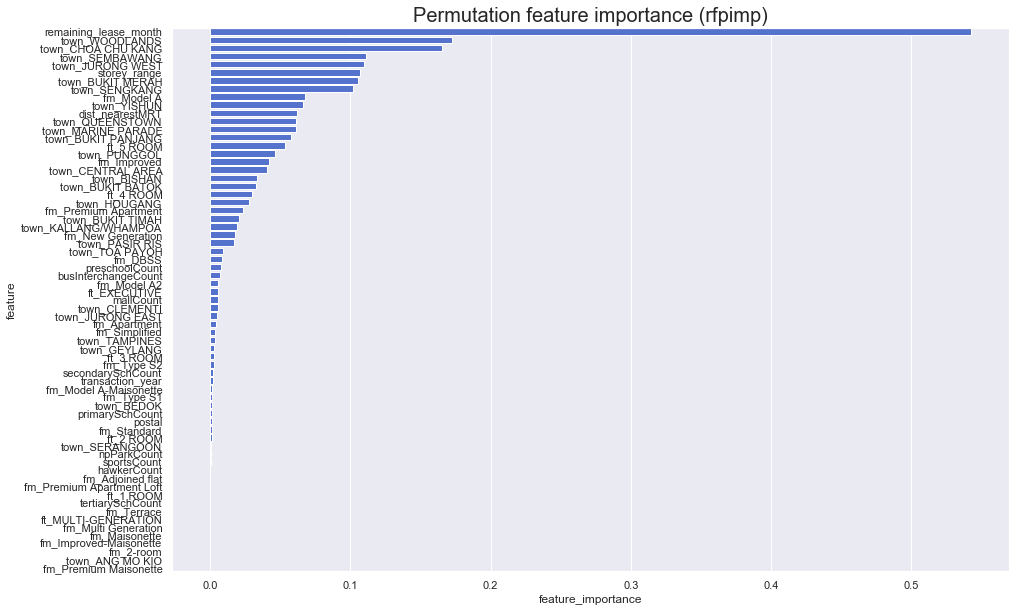

In [99]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(LR, x_train, y_train):
    return r2_score(y_train, LR.predict(x_train))

perm_imp_rfpimp = permutation_importances(LR, x_train, y_train, r2)

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

# plotting a feature importance dataframe (horizontal barchart)

def var_imp_plot(imp_df, title):
    imp_df = imp_df.reset_index()
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue').set_title(title, fontsize = 20)

var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')
